## Setup Mario

In [6]:
pip install -r requirement.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 11.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.6/540.6 kB 26.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 19.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.8/177.8 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 25.4 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.7/232.7 kB 52.0 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 25.4 MB/s eta 0:00:00m eta 0:00:010:01:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 68.2 MB/s eta 0:00:00
  Created wheel for atari-py: filename=atari_py-0.2.9-cp310-cp310-linux_x86_64.whl size=2552743 sha256=8b4597d0c71f53f76a192d77b76cbd46639488c84feb48a5554fe81caeadd082
  Stored in directory: /home/dexter/.cache/pip/wheels/64/ba/ae/108ce8e7d54f6f5eff349f4a0bada27b3fdc322619937bf318
Successfully built atari-py
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import game
import gym_super_mario_bros
# Import joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import simplified control
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [3]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v3')
# Simple movement allows better training (less complicated control)
env = JoypadSpace(env, SIMPLE_MOVEMENT)

/home/dexter/anaconda3/envs/rl_gym/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:97: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  logger.warn(


In [29]:
# Print functions
# SIMPLE_MOVEMENT
# env.action_space.sample()
# SIMPLE_MOVEMENT[env.action_space.sample()]
# env.observation_space.shape

In [25]:
# Create a flag - restart or not
done = True
# loop over every frame of the game
for step in range(100000):
    # start the game to begin with
    if done:
        # this is where the game start/reset
        env.reset()
    # do env.action_space.sample() generates a random action
    state, reward, done, info = env.step(env.action_space.sample())
    # show the game
    env.render()
# close the game
env.close

/home/dexter/anaconda3/envs/rl_gym/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:297: UserWarning: WARN: No render modes was declared in the environment (env.metadata['render_modes'] is None or not defined), you may have trouble when calling `.render()`
  logger.warn(
/home/dexter/anaconda3/envs/rl_gym/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:305: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps
  logger.warn(
/home/dexter/anaconda3/envs/rl_gym/lib/python3.10/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 

In [4]:
# Print functions
# state = env.reset()
# env.step(1)[3]

# Pre-processing

In [8]:
# Import Frame Stacker Wrapper and GrayScaling wrapper
from gym.wrappers import FrameStack, GrayScaleObservation
# Import Vectorization Wrapper
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show impact of framestacking
from matplotlib import pyplot as plt

In [10]:
# 1. Create base environment
env = gym_super_mario_bros.make('SuperMarioBros-v3')
# 2. Simplify controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Greyscale (debug state = env.reset(), state.shape, plt.imshow(state))
env = GrayScaleObservation(env, keep_dim=True)
# 4.

/home/dexter/anaconda3/envs/rl_gym/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:97: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  logger.warn(


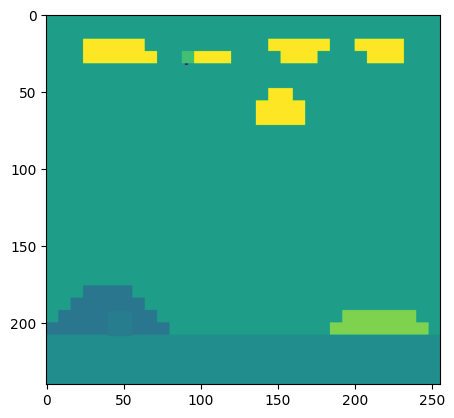

In [11]:
state = env.reset()
plt.imshow(state)